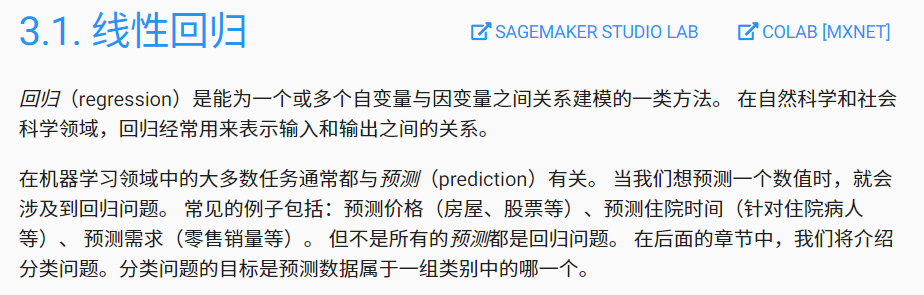

# 1. 线性回归的基本元素

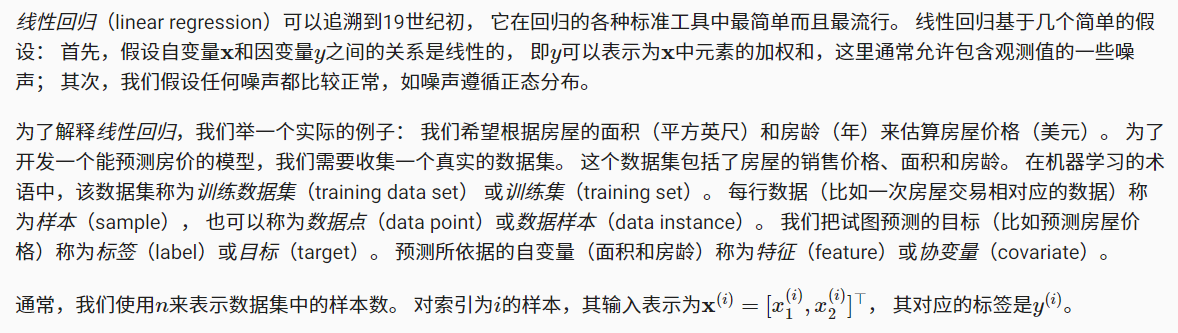

## 1.1. 线性模型

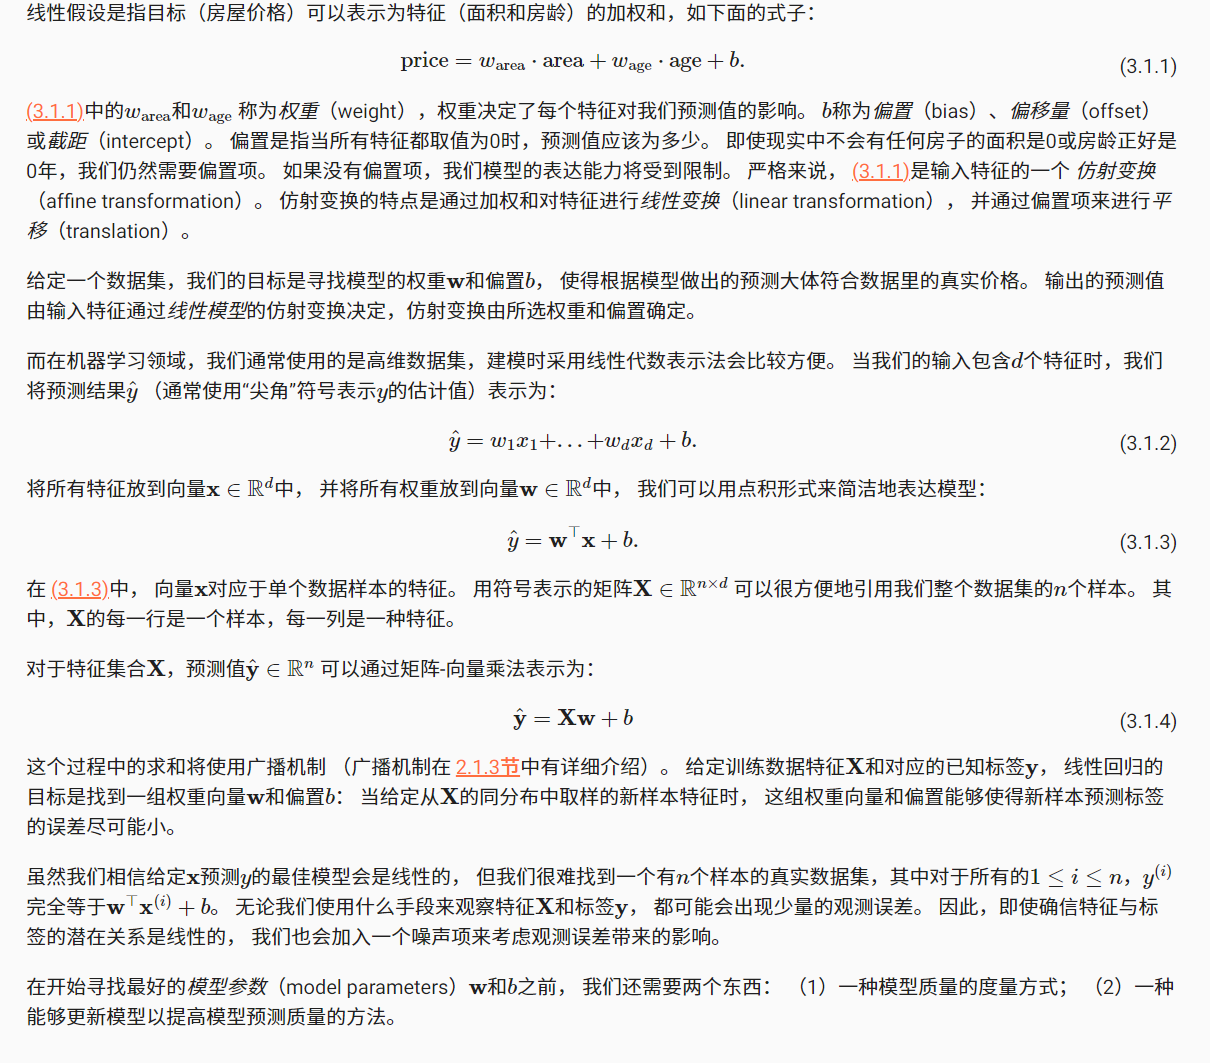

## 1.2. 损失函数

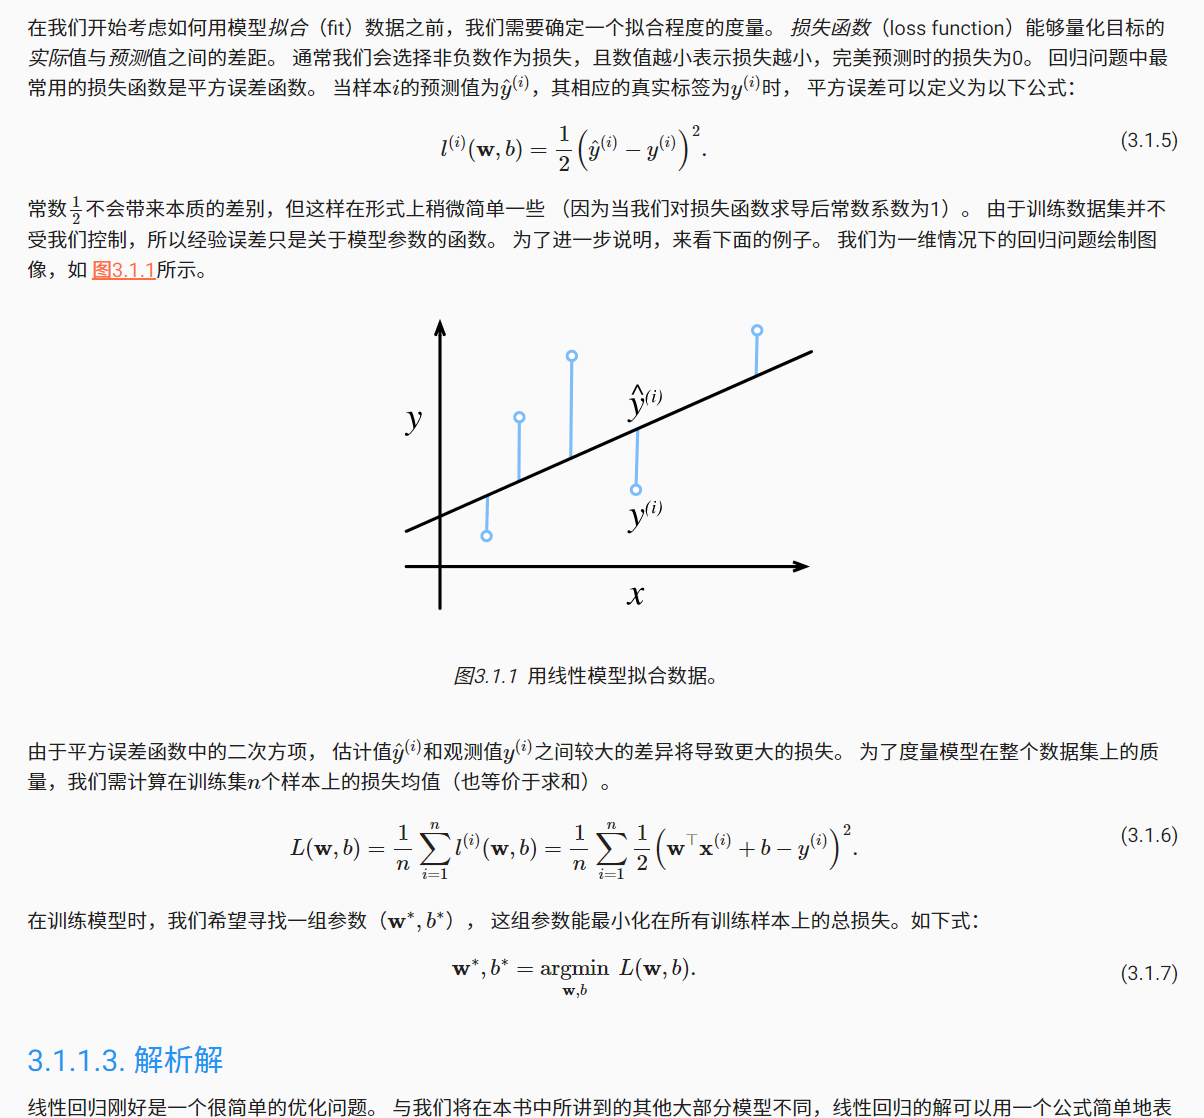

## 1.3. 解析解

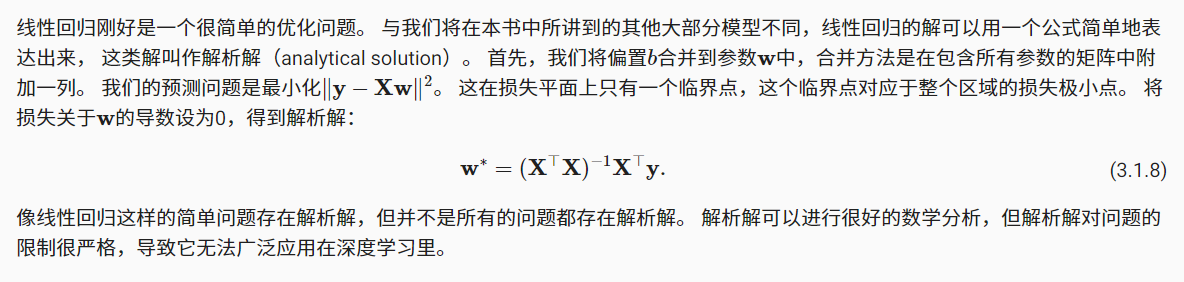

## 1.4. 随机梯度下降

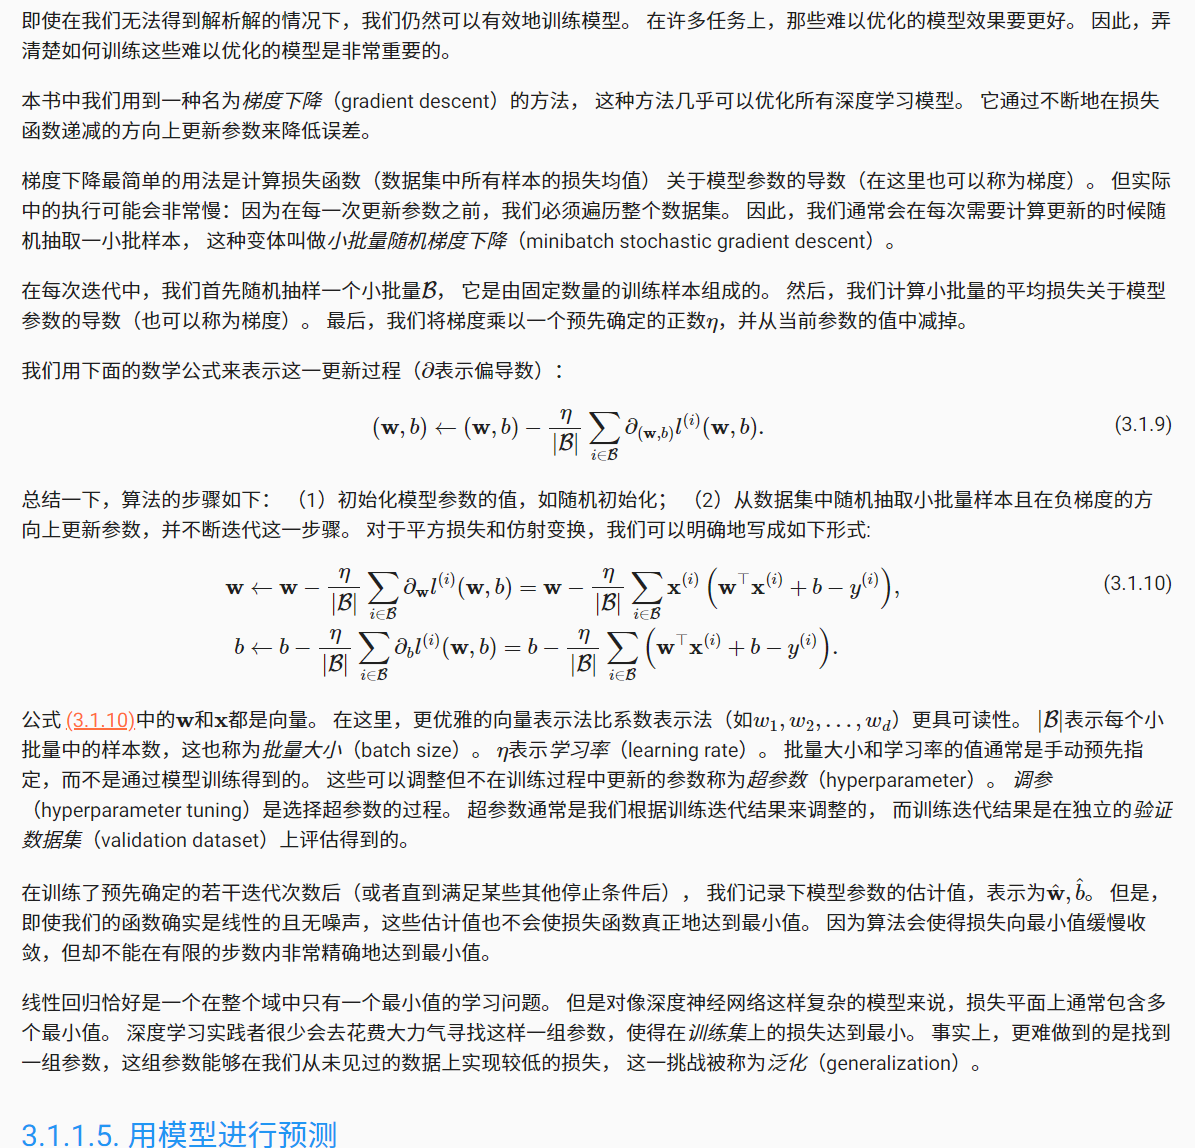

## 1.5. 用模型进行预测

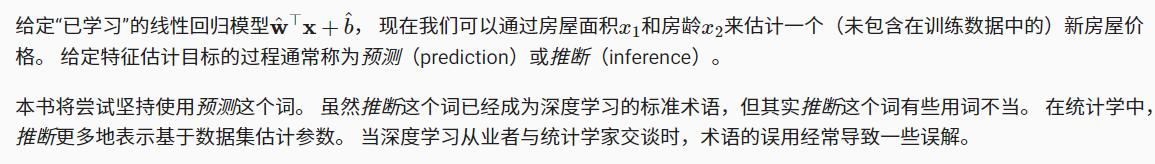

# 2. 矢量化加速

在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

In [1]:
import sys

sys.path.append('../../../../')
sys.path
from d2l import torch as d2l

In [2]:
%matplotlib inline
import math
import time
import numpy as np
import torch

为了说明矢量化为什么如此重要，我们考虑对向量相加的两种方法。 我们实例化两个全为1的10000维向量。 在一种方法中，我们将使用Python的for循环遍历向量； 在另一种方法中，我们将依赖对+的调用。

In [3]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

由于在本书中我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器：

In [4]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

现在我们可以对工作负载进行基准测试。


首先，我们使用for循环，每次执行一位的加法。

In [5]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.10883 sec'

或者，我们使用重载的+运算符来计算按元素的和。

In [6]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。

# 3. 正态分布与平方损失

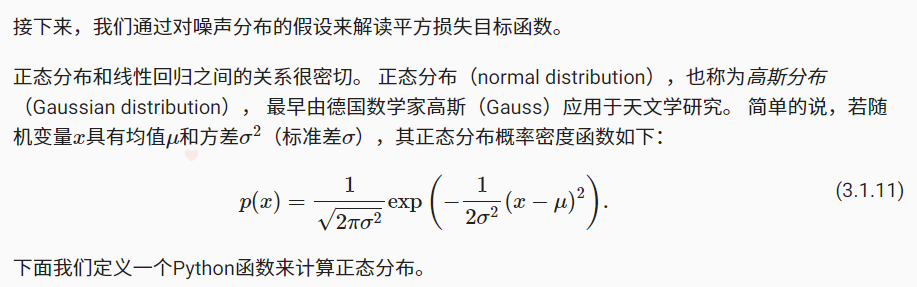

In [7]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

我们现在可视化正态分布。

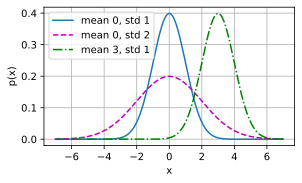

In [9]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.001)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

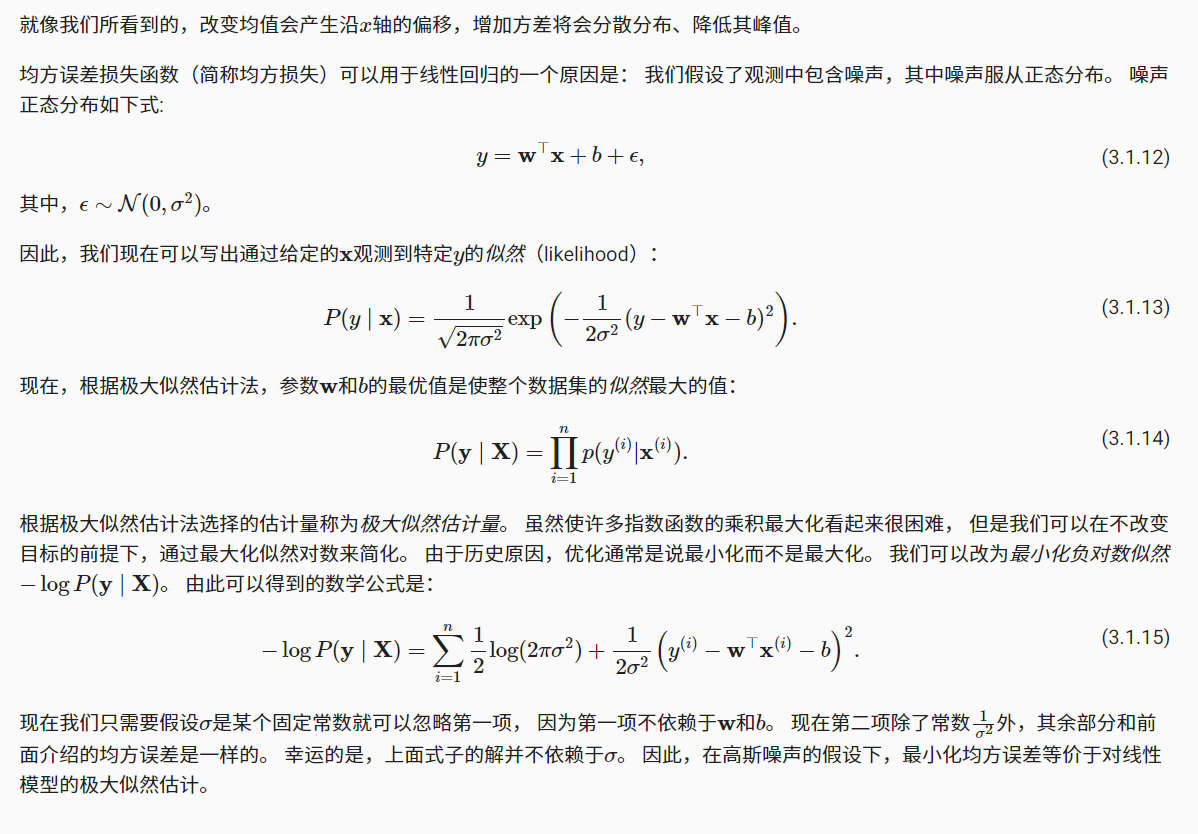

# 4. 从线性回归到深度网络

到目前为止，我们只谈论了线性模型。 尽管神经网络涵盖了更多更为丰富的模型，我们依然可以用描述神经网络的方式来描述线性模型， 从而把线性模型看作一个神经网络。 首先，我们用“层”符号来重写这个模型。

## 4.1. 神经网络图

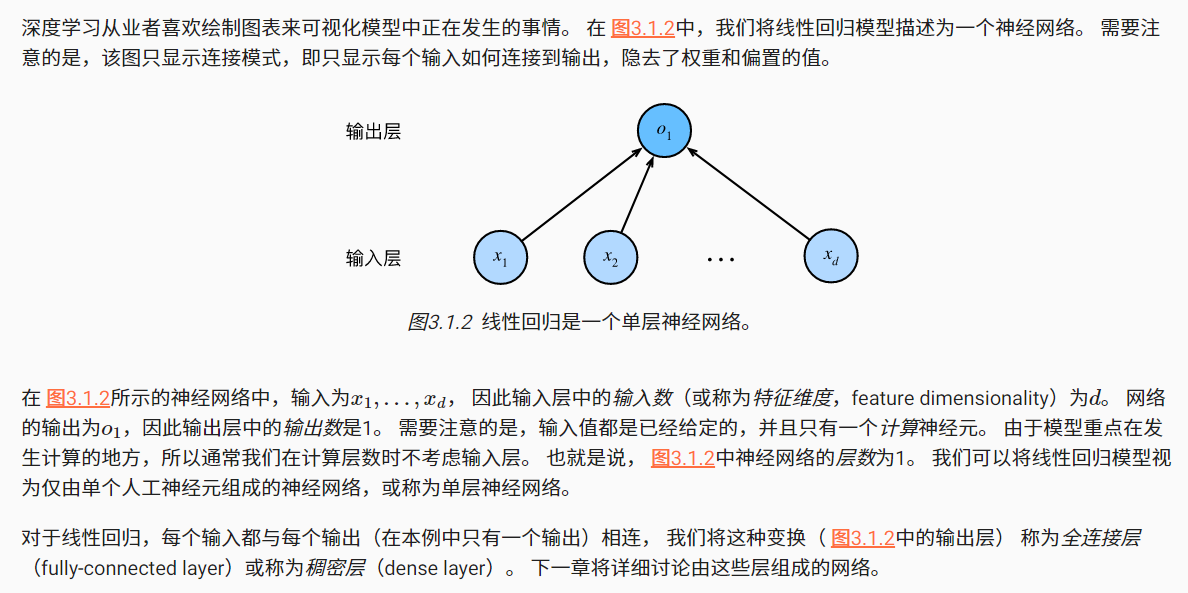

## 4.2. 生物学

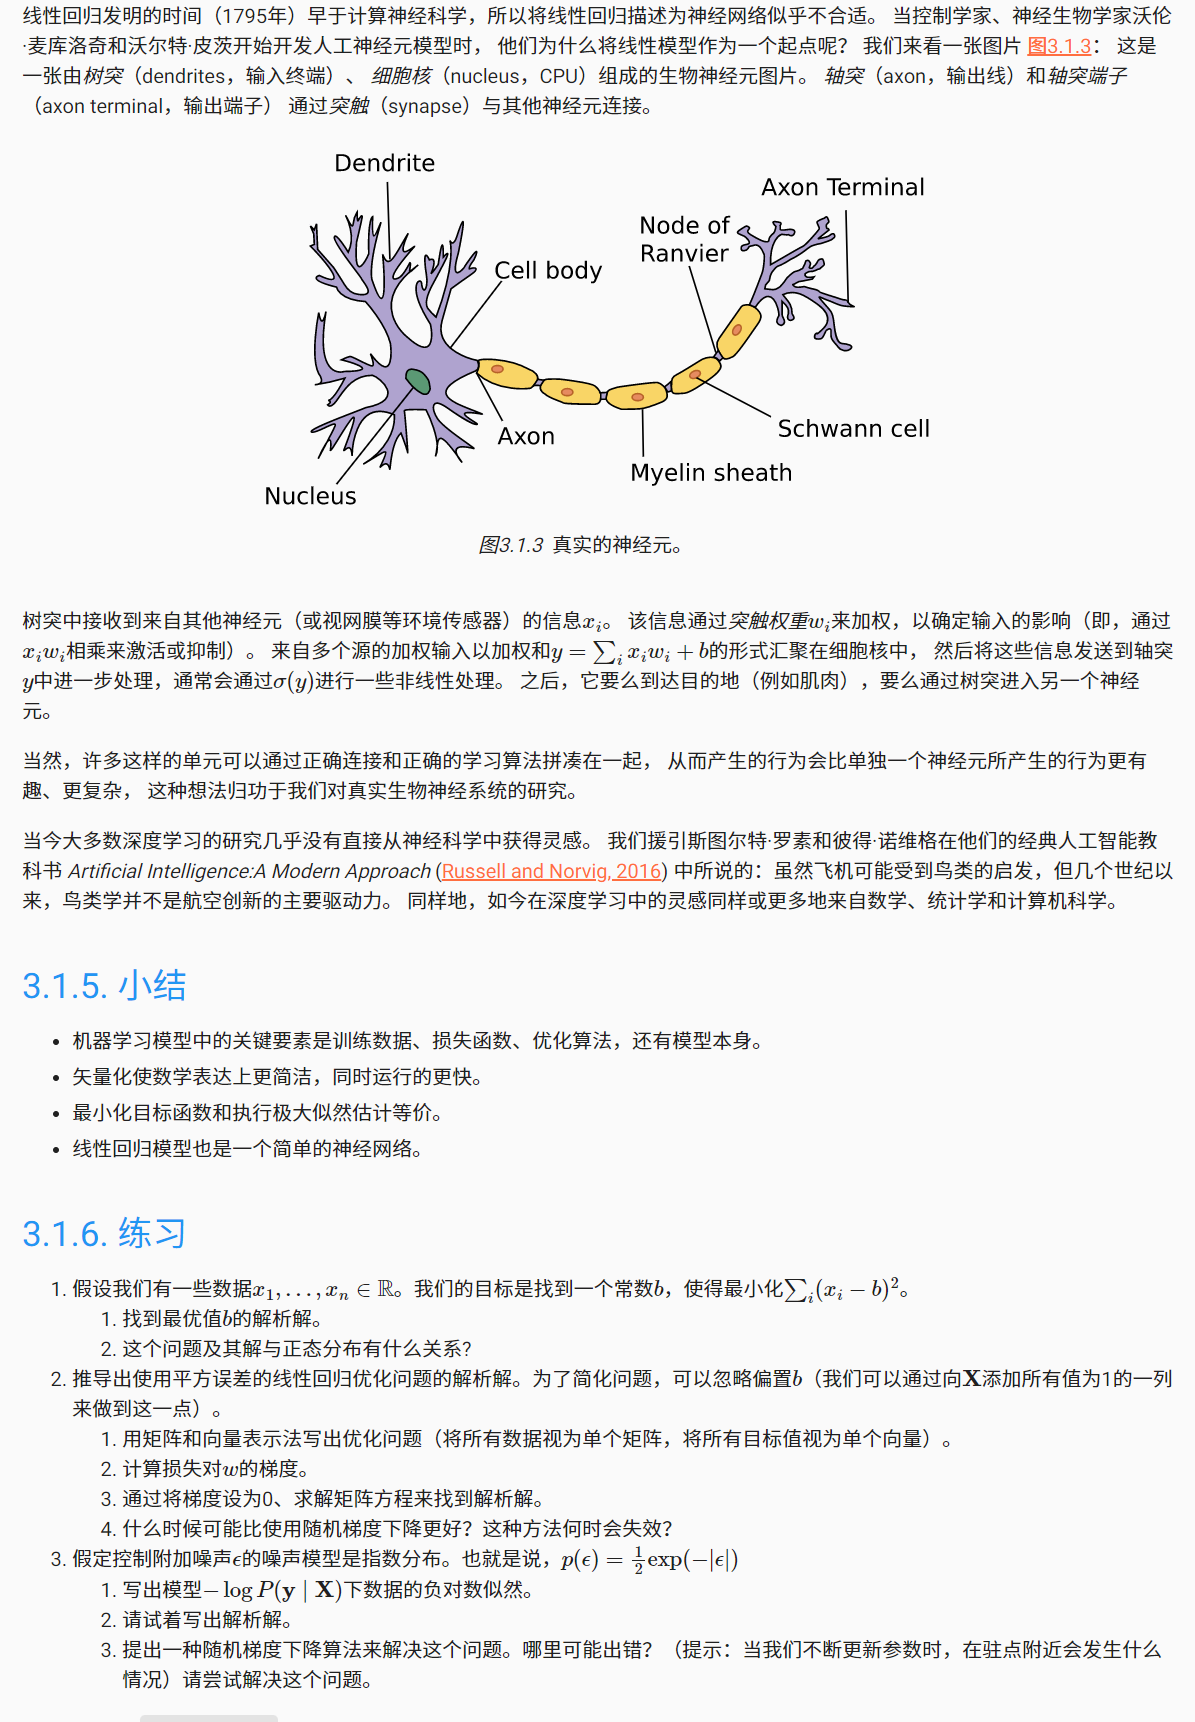